# Image Classification with Convolutional Neural Networks using TensorFlow in Python

###  Dogs And Cats - Image Classification

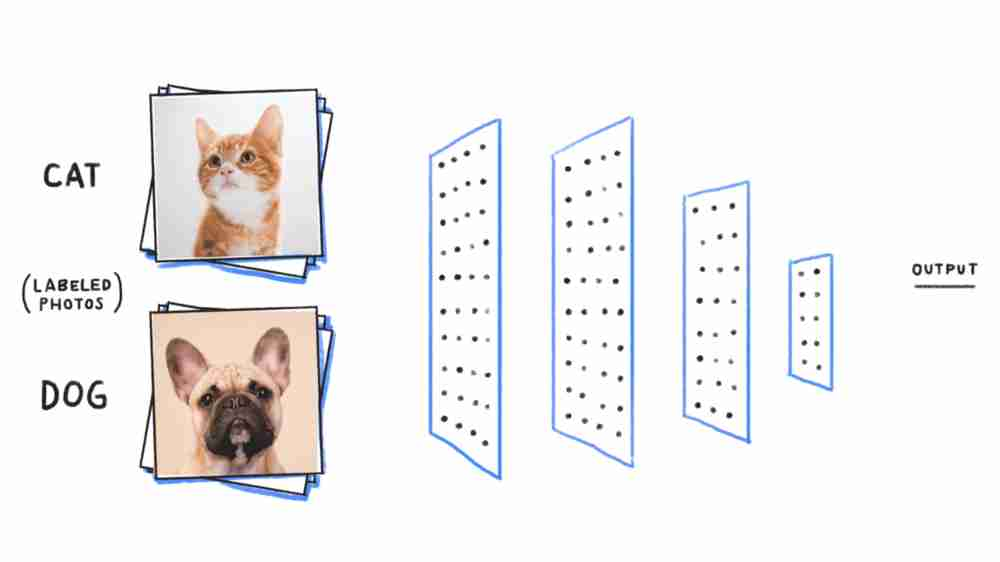

# Part1: Building the CNN

#### Importing the keras library and packages 

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


#### Initialising the CNN

In [2]:
classifier = Sequential()

#### Step 1 - Convolution

In [3]:
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation = 'relu'))

/home/ml/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


#### Step 2 - Pooling

In [4]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

#### Step 3 - Flattening

In [5]:
classifier.add(Flatten())

#### Step 4 - Full connection

In [6]:
classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(output_dim=1,activation='sigmoid'))

/home/ml/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
/home/ml/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


#### compliling the classifier

In [7]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Part2: Fitting the CNN to the images

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
save_to_dir=r'/home/ml/Desktop/Anomoly/data/training_set'

In [12]:
training_set = train_datagen.flow_from_directory(
        'data/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory(
        'data/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=8000,
        epochs=25,
        validation_data=test_set,
        validation_steps=2000)

Epoch 1/25
8000/8000 [==============================] - 2980s 372ms/step - loss: 0.3956 - acc: 0.8140 - val_loss: 0.7291 - val_acc: 0.7610
Epoch 2/25
8000/8000 [==============================] - 3073s 384ms/step - loss: 0.1454 - acc: 0.9433 - val_loss: 1.0305 - val_acc: 0.7673
Epoch 3/25
8000/8000 [==============================] - 3174s 397ms/step - loss: 0.0768 - acc: 0.9725 - val_loss: 1.3020 - val_acc: 0.7629
Epoch 4/25
8000/8000 [==============================] - 2942s 368ms/step - loss: 0.0534 - acc: 0.9816 - val_loss: 1.4444 - val_acc: 0.7632
Epoch 5/25
8000/8000 [==============================] - 2923s 365ms/step - loss: 0.0408 - acc: 0.9861 - val_loss: 1.8555 - val_acc: 0.7383
Epoch 6/25
8000/8000 [==============================] - 2921s 365ms/step - loss: 0.0346 - acc: 0.9885 - val_loss: 1.7106 - val_acc: 0.7545
Epoch 7/25
3685/8000 [============>.................] - ETA: 22:26 - loss: 0.0325 - acc: 0.9893